In [11]:
%matplotlib inline

# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from pprint import pprint 
from scipy.stats import linregress


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}appid={weather_api_key}&q={city}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt'] 

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tura


Processing Record 2 of Set 1 | talara
Processing Record 3 of Set 1 | tralee
Processing Record 4 of Set 1 | klyuchi
Processing Record 5 of Set 1 | thompson
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | brookings
Processing Record 8 of Set 1 | ifrane
Processing Record 9 of Set 1 | port douglas
Processing Record 10 of Set 1 | vilyuchinsk
Processing Record 11 of Set 1 | petropavlovsk-kamchatsky
Processing Record 12 of Set 1 | barah
Processing Record 13 of Set 1 | labytnangi
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | mimon
Processing Record 16 of Set 1 | sao sepe
Processing Record 17 of Set 1 | bilibino
Processing Record 18 of Set 1 | tiksi
Processing Record 19 of Set 1 | san luis de la loma
Processing Record 20 of Set 1 | lere
Processing Record 21 of Set 1 | pisco
Processing Record 22 of Set 1 | iqaluit
Processing Record 23 of Set 1 | mount pearl
Processing Record 24 of Set 1 | puerto natales
Processing Record 25 of Set 1 | lompoc
P

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tura,25.5198,90.2201,23.78,97,100,2.69,IN,1690403338
1,talara,-4.5772,-81.2719,28.42,57,0,7.20,PE,1690403200
2,tralee,52.2704,-9.7026,16.77,97,100,4.36,IE,1690403334
3,klyuchi,52.2667,79.1667,23.12,34,100,3.21,RU,1690403067
4,thompson,55.7435,-97.8558,16.09,63,100,5.66,CA,1690403081


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tura,25.5198,90.2201,23.78,97,100,2.69,IN,1690403338
1,talara,-4.5772,-81.2719,28.42,57,0,7.20,PE,1690403200
2,tralee,52.2704,-9.7026,16.77,97,100,4.36,IE,1690403334
3,klyuchi,52.2667,79.1667,23.12,34,100,3.21,RU,1690403067
4,thompson,55.7435,-97.8558,16.09,63,100,5.66,CA,1690403081


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

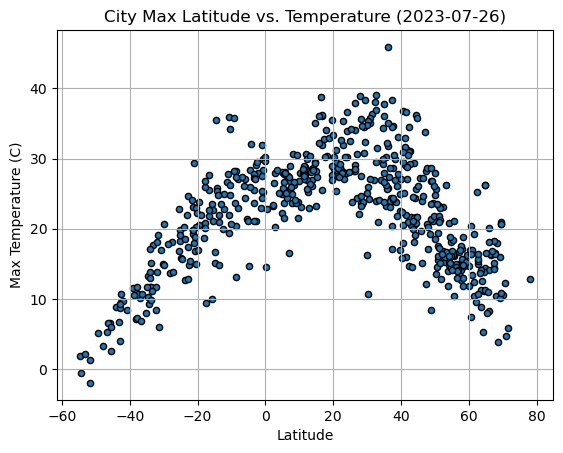

In [15]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot('Lat','Max Temp',kind='scatter',xlabel='Latitude',ylabel='Max Temperature (C)',edgecolors='black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature (2023-07-26)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

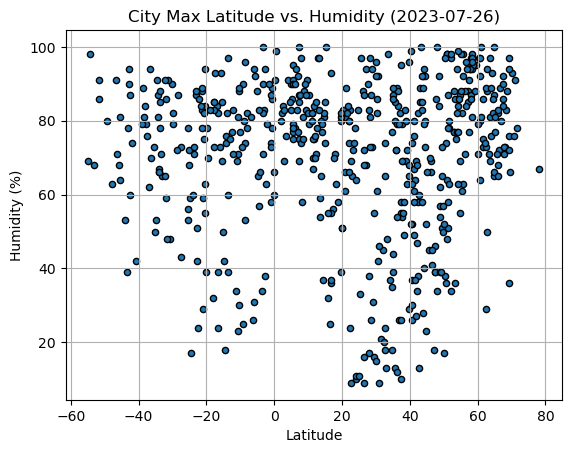

In [16]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot('Lat','Humidity',kind='scatter',xlabel='Latitude',ylabel='Humidity (%)',edgecolors='black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Humidity (2023-07-26)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

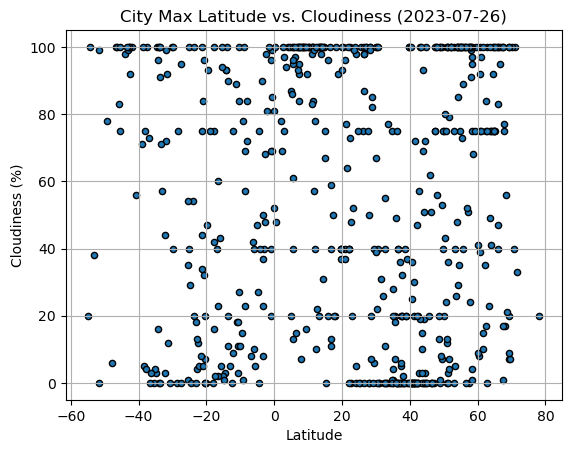

In [14]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot('Lat','Cloudiness',kind='scatter',xlabel='Latitude',ylabel='Cloudiness (%)',edgecolors='black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Cloudiness (2023-07-26)')
plt.grid()


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

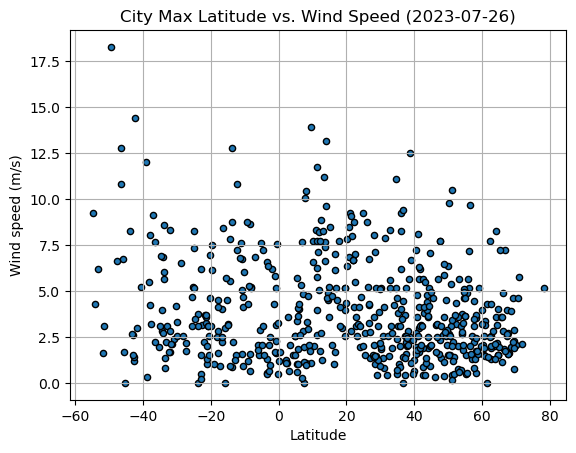

In [15]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot('Lat','Wind Speed',kind='scatter',xlabel='Latitude',ylabel='Wind speed (m/s)',edgecolors='black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Wind Speed (2023-07-26)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [53]:
# Define a function to create Linear Regression plots
def regress_plot(data,variable,xy):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(data['Lat'],data[variable])
    regress_values = data['Lat'] * slope + intercept
    data.plot('Lat',variable,kind='scatter',xlabel='Latitude')
    plt.plot(data['Lat'],regress_values,'-r')
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq,xy,fontsize=15,color="red")
    print(f'The r-value is: {rvalue}')
    plt.show()

The r-value is: -0.18278476575741615


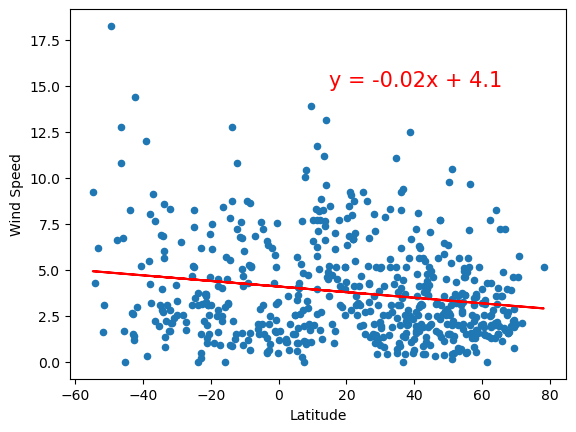

In [54]:
regress_plot(city_data_df,'Wind Speed',(15,15))


In [43]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] > 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tura,25.5198,90.2201,23.78,97,100,2.69,IN,1690403338
2,tralee,52.2704,-9.7026,16.77,97,100,4.36,IE,1690403334
3,klyuchi,52.2667,79.1667,23.12,34,100,3.21,RU,1690403067
4,thompson,55.7435,-97.8558,16.09,63,100,5.66,CA,1690403081
6,brookings,44.3114,-96.7984,36.14,40,0,5.14,US,1690403339


In [44]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,talara,-4.5772,-81.2719,28.42,57,0,7.20,PE,1690403200
5,adamstown,-25.0660,-130.1015,19.84,68,100,8.25,PN,1690403075
8,port douglas,-16.4833,145.4667,21.81,82,60,8.41,AU,1690403234
13,bredasdorp,-34.5322,20.0403,10.26,91,100,2.80,ZA,1690403142
15,sao sepe,-30.1606,-53.5653,14.92,90,100,4.18,BR,1690403340


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6319933117254656


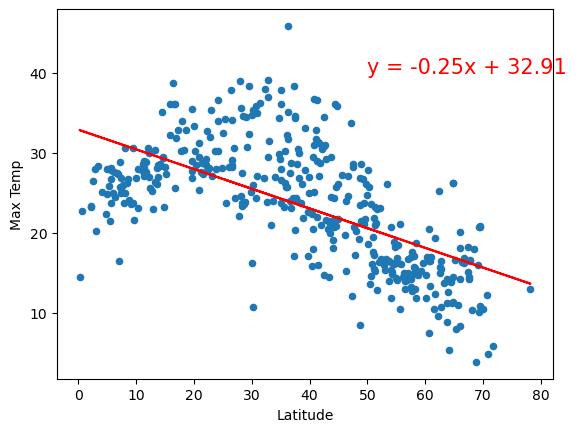

In [57]:
# Linear regression on Northern Hemisphere
regress_plot(northern_hemi_df,'Max Temp',(50,40))

The r-value is: 0.8653351244170909


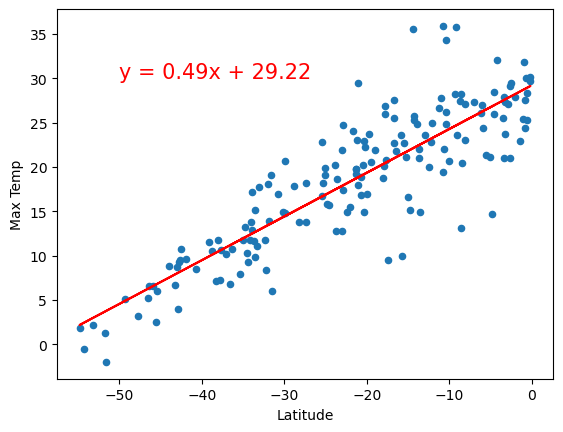

In [59]:
# Linear regression on Southern Hemisphere
regress_plot(southern_hemi_df,'Max Temp',(-50,30))

**Discussion about the linear relationship:** 

There is a clear correlation between temperature and latitude. However in the northern hemisphere we see an increase before 20 degrees, corresponding to the tilt of the Earth. Thus, these cities are effectually in the southern hemisphere.


### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.060690509589019385


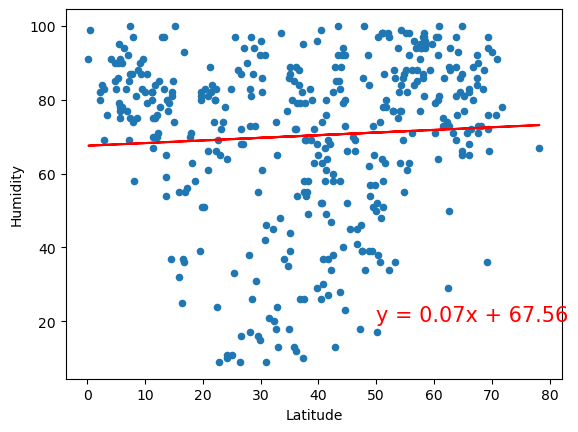

In [66]:
# Northern Hemisphere
regress_plot(northern_hemi_df,'Humidity',(50,20))

The r-value is: -0.07298315851646149


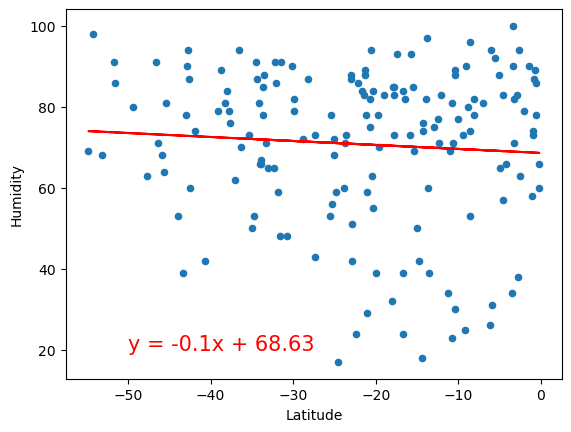

In [67]:
# Southern Hemisphere
regress_plot(southern_hemi_df,'Humidity',(-50,20))

**Discussion about the linear relationship:** 

We see no correlation between humidity and latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.11631431061840376


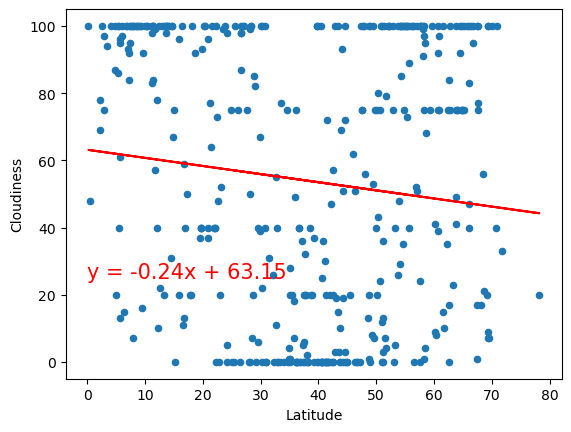

In [69]:
# Northern Hemisphere
regress_plot(northern_hemi_df,'Cloudiness',(0,25))

The r-value is: -0.14651197961692825


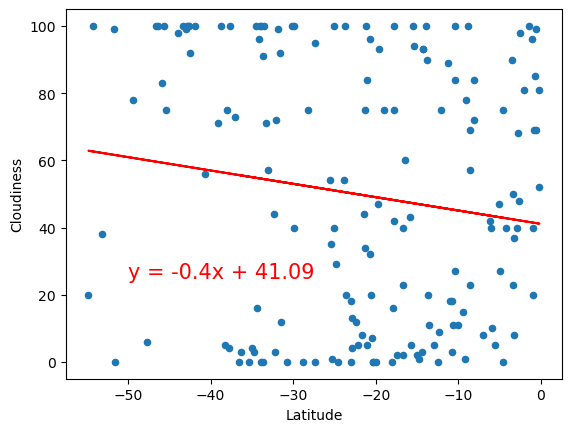

In [71]:
# Southern Hemisphere
regress_plot(southern_hemi_df,'Cloudiness',(-50,25))

**Discussion about the linear relationship:** 

No significant correlation between cloudiness and latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.2201959521717072


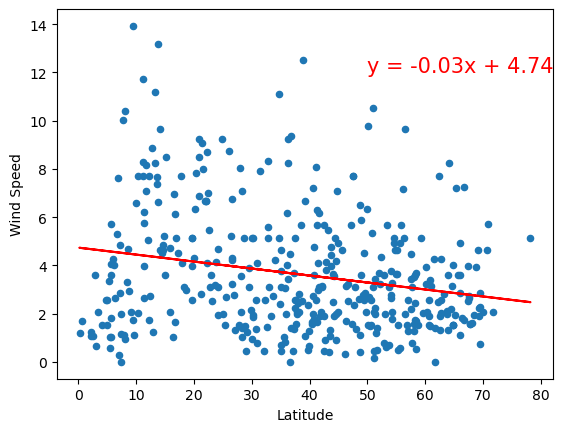

In [73]:
# Northern Hemisphere
regress_plot(northern_hemi_df,'Wind Speed',(50,12))

The r-value is: -0.18711512534219746


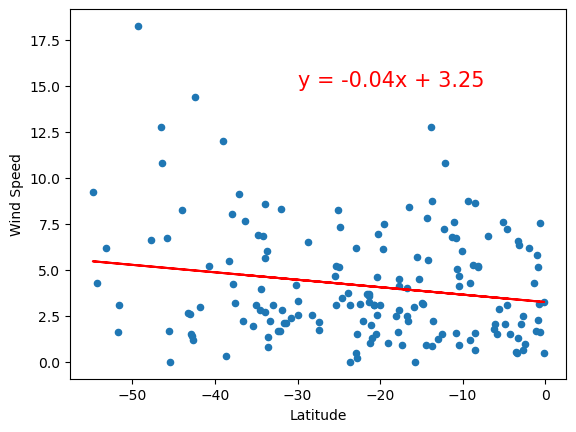

In [76]:
# Southern Hemisphere
regress_plot(southern_hemi_df,'Wind Speed',(-30,15))

**Discussion about the linear relationship:** 

No significant correlation between wind speed and latitude.